Importing relevent libraries and dataset

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
baseStation = pd.read_csv('Dataset/base-station.csv')
energy = pd.read_csv('Dataset/energy.csv')
esmodes = pd.read_csv('Dataset/esmodes.csv')

Defining helper functions

In [75]:
def plotLineGraph(x,y,xlabel,ylabel,title):
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid(True)
    for a, b in zip(x, y):
        plt.annotate(text=str(b), xy=(a, b), xytext=(10, 5), textcoords='offset points', ha='center')
    plt.title(title)
    plt.show()


Exploring baseStation dataset

In [25]:
baseStation

,BS,CellName,RUType,Mode,Frequency,Bandwidth,Antennas,TXpower
0,B_0,Cell0,Type1,Mode2,365.000,20,4,6.875934
1,B_1,Cell0,Type2,Mode2,532.000,20,4,6.875934
2,B_2,Cell0,Type1,Mode2,365.000,20,4,6.875934
3,B_3,Cell0,Type2,Mode2,532.000,20,4,6.875934
4,B_4,Cell0,Type2,Mode2,532.000,20,4,6.875934
...,...,...,...,...,...,...,...,...
1212,B_925,Cell1,Type8,Mode1,697.002,10,4,7.877728
1213,B_105,Cell2,Type1,Mode2,426.980,2,2,6.877429
1214,B_745,Cell2,Type1,Mode2,426.980,2,2,6.877429
1215,B_105,Cell3,Type1,Mode2,426.980,2,2,6.877429


In [58]:
# BS: Base Station

print(baseStation['BS'].nunique())
print(baseStation['BS'].unique())

# 1020 base stations are available.

1020
['B_0' 'B_1' 'B_2' ... 'B_1017' 'B_1018' 'B_1019']


12
RUType
Type1     401
Type4     231
Type6     199
Type7     116
Type5      67
Type3      49
Type11     36
Type2      35
Type9      27
Type12     22
Type10     21
Type8      13
Name: count, dtype: int64


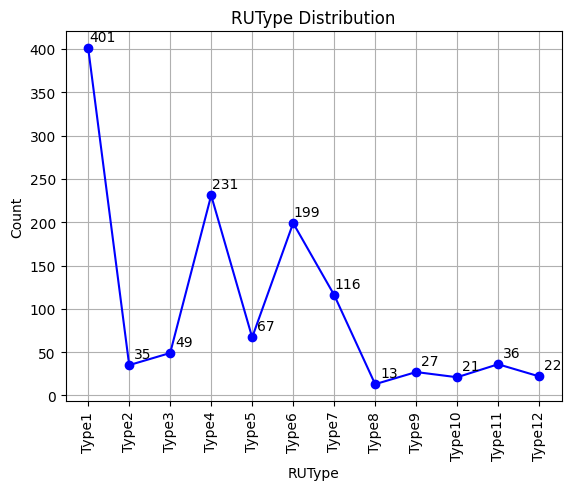

In [76]:
# RUTypes

print(baseStation['RUType'].nunique())
print(baseStation['RUType'].value_counts())

plotLineGraph(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False), 'RUType', 'Count', 'RUType Distribution')

# # count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(x='RUType', data=baseStation)
# plt.title('RUType vs. Count')
# plt.show()

# line plot
# plt.plot(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False), marker='o', linestyle='-', color='b', label='RUType')
# plt.xlabel('RUType')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.grid(True)
# for x, y in zip(baseStation['RUType'].unique(), baseStation['RUType'].value_counts(sort=False)):
#     plt.annotate(text=str(y), xy=(x, y), xytext=(10, 5), textcoords='offset points', ha='center')
# plt.title('RUType Distribution')
# plt.show()

In [61]:
# Modes

print(baseStation['Mode'].unique())

['Mode2' 'Mode1']


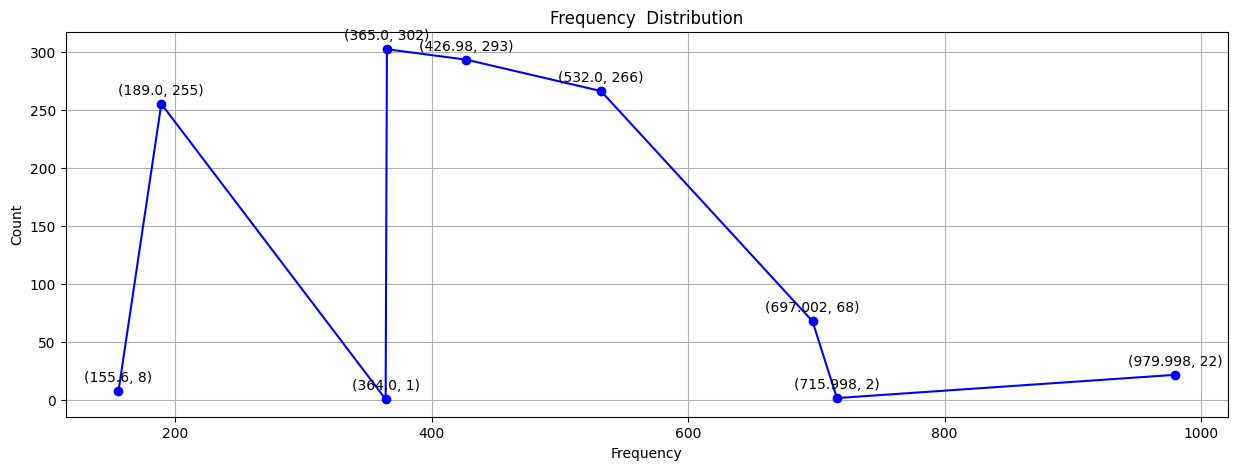

In [132]:
# Frequency

frequency = pd.DataFrame(baseStation['Frequency'].value_counts())
# sort dataframe by Frequency column
frequency.sort_values(by=['Frequency'], inplace=True)
frequency.reset_index(inplace=True)

frequency
# plot a bar chart with frequency and count using matplotlib.plypot

# plt.figure(figsize=(10, 5))
# plt.bar(frequency['count'], frequency['Frequency'])
# plt.xlabel('Frequency')
# plt.ylabel('Count')
# plt.title('Frequency Distribution')
# plt.grid(True)
# plt.show()

# line plot
plt.figure(figsize=(15, 5))
plt.plot(frequency['Frequency'],frequency['count'], marker='o', linestyle='-', color='b',)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
for x, y in zip(frequency['Frequency'],frequency['count']):
    plt.annotate(text=(x,y), xy=(x, y), xytext=(0,7), textcoords='offset points', ha='center')
plt.title('Frequency  Distribution')
plt.show()


[20 10  5  2  8]


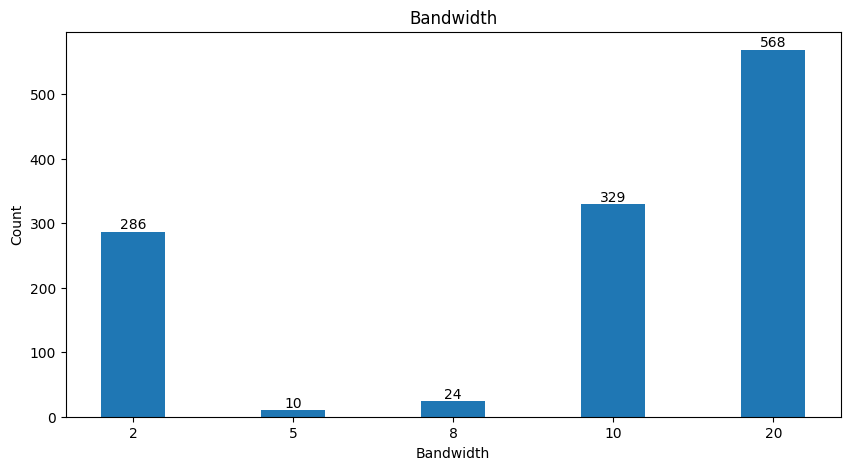

In [187]:
# Bandwidth

print(baseStation['Bandwidth'].unique())
# print(baseStation['Bandwidth'].value_counts())

bandwidth = pd.DataFrame(baseStation['Bandwidth'].value_counts())
bandwidth.sort_values(by=['Bandwidth'], inplace=True)
bandwidth.reset_index(inplace=True)

# plt.figure(figsize=(10, 5))
# plt.bar(bandwidth['Bandwidth'], bandwidth['count'])
# plt.xlabel('Bandwidth')
# plt.ylabel('Count')
# plt.xticks(bandwidth['Bandwidth'])
# for i in range(len(bandwidth)):
#     plt.text(x=bandwidth['Bandwidth'][i], y=bandwidth['count'][i] + 5, s=bandwidth['count'][i], ha='center')
# plt.title('Bandwidth')
# plt.show()


plt.figure(figsize=(10, 5))
num_bars = len(bandwidth)
bar_interval = 2
x_values = np.arange(0, num_bars * bar_interval, bar_interval)
plt.bar(x_values, bandwidth['count'])
plt.xlabel('Bandwidth')
plt.ylabel('Count')
plt.title('Bandwidth')
plt.xticks(x_values, bandwidth['Bandwidth'])
for x, y in zip(x_values, bandwidth['count']):
    plt.text(x, y + 5, str(y), ha='center')
plt.show()

[ 4  2  1  8 32 64]
Antennas
2     949
1      99
4      82
8      44
64     22
32     21
Name: count, dtype: int64


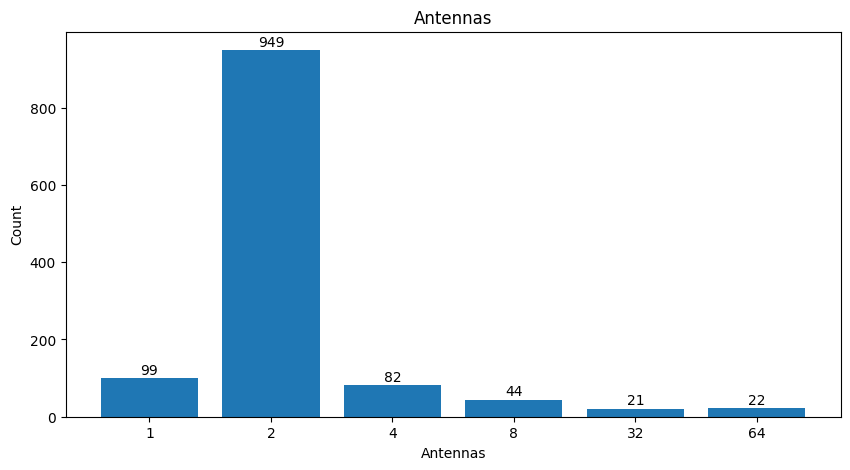

In [190]:
print(baseStation['Antennas'].unique())
print(baseStation['Antennas'].value_counts())

antennas = pd.DataFrame(baseStation['Antennas'].value_counts())
antennas.sort_values(by=['Antennas'], inplace=True)
antennas.reset_index(inplace=True)
plt.figure(figsize=(10, 5))
num_bars = len(antennas)
bar_interval = 1
x_values = np.arange(0, num_bars * bar_interval, bar_interval)

plt.bar(x_values, antennas['count'])
plt.xlabel('Antennas')
plt.ylabel('Count')
plt.title('Antennas')
plt.xticks(x_values, antennas['Antennas'])
for x, y in zip(x_values, antennas['count']):
    plt.text(x, y + 10, str(y), ha='center')
plt.show()

[6.87593423 6.42750374 5.97907324 6.12855007 5.68011958 6.57698057
 5.38116592 5.94917788 6.7264574  6.39760837 6.41255605 6.68161435
 6.98056801 6.53213752 8.37533632 7.32585949 8.04648729 7.5980568
 8.03617339 7.32152466 8.03452915 7.31629297 7.91659193 7.88744395
 7.8916293  8.03273543 6.69192825 7.88206278 7.10134529 6.37279522
 8.01330344 7.31838565 7.32571002 7.31943199 7.08639761 7.32750374
 7.32361734 6.877429   6.76158445 7.34424514 7.34020927 7.33617339
 7.55007474 7.87772795]


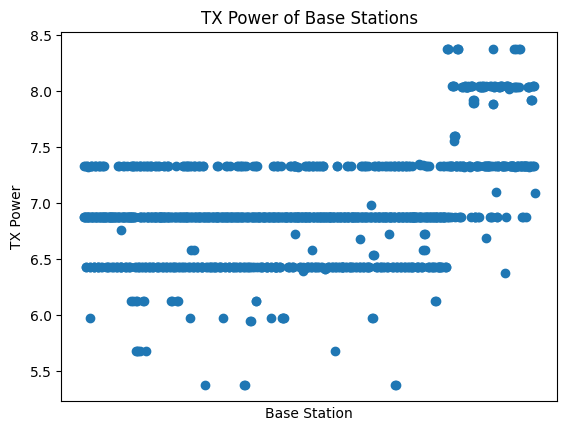

In [198]:
print(baseStation['TXpower'].unique())

plt.scatter(baseStation['BS'], baseStation['TXpower'])
plt.xlabel('Base Station')
plt.ylabel('TX Power')
plt.xticks([])
plt.title('TX Power of Base Stations')
plt.show()

Exploring energy dataset

In [4]:
energy

,Time,BS,Energy
0,1/1/2023 1:00,B_0,64.275037
1,1/1/2023 2:00,B_0,55.904335
2,1/1/2023 3:00,B_0,57.698057
3,1/1/2023 4:00,B_0,55.156951
4,1/1/2023 5:00,B_0,56.053812
...,...,...,...
92624,1/2/2023 17:00,B_1018,14.648729
92625,1/2/2023 18:00,B_1018,14.648729
92626,1/2/2023 21:00,B_1018,13.452915
92627,1/2/2023 22:00,B_1018,13.602392


Exploring esmodes dataset

In [5]:
esmodes

,Time,BS,CellName,load,ESMode1,ESMode2,ESMode3,ESMode4,ESMode5,ESMode6
0,1/1/2023 1:00,B_0,Cell0,0.487936,0.0,0.0,0.0,0,0.0,0.0
1,1/1/2023 2:00,B_0,Cell0,0.344468,0.0,0.0,0.0,0,0.0,0.0
2,1/1/2023 3:00,B_0,Cell0,0.193766,0.0,0.0,0.0,0,0.0,0.0
3,1/1/2023 4:00,B_0,Cell0,0.222383,0.0,0.0,0.0,0,0.0,0.0
4,1/1/2023 5:00,B_0,Cell0,0.175436,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
125570,1/2/2023 19:00,B_745,Cell3,0.071000,0.0,0.0,0.0,0,0.0,0.0
125571,1/2/2023 20:00,B_745,Cell3,0.064962,0.0,0.0,0.0,0,0.0,0.0
125572,1/2/2023 21:00,B_745,Cell3,0.081865,0.0,0.0,0.0,0,0.0,0.0
125573,1/2/2023 22:00,B_745,Cell3,0.097615,0.0,0.0,0.0,0,0.0,0.0
